In [79]:
"""
som_mqe.ipynb
Created at 08/06/2019
"""
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sompy.sompy import SOMFactory

# Change this project dir
projectDir = "~/Desktop/HW3"

In [80]:
"""
Normalize the data points to unit vector
param points: An array of 2D points
"""
def normalization(points):
    pointsSquare = np.square(points)
    lengths = pointsSquare[:, 0] + pointsSquare[:, 1]
    lengths = np.square(lengths)
    
    points[:, 0] / lengths
    points[:, 1] / lengths
    
    return points

In [81]:
# read the data
featurePath = os.path.expanduser(projectDir)

trainingDataframe = pd.read_csv(featurePath + "/data_feature.csv", header = None)
trainingDataframe.columns = ["20.8Hz", "84.6Hz", "label"]
trainingDataframe.drop(columns = "label", inplace = True)

# Show the data a bit
# dataframe

In [82]:
# read testing data
testingDataframe = pd.read_csv(featurePath + "/data_testing.csv", header = None)
testingDataframe.columns = ["20.8Hz", "84.6Hz", "label"]
testingDataframe.drop(columns = "label", inplace = True)

In [83]:
# We need only "Healthy" data for SOM-MQE
healthyDataframe = trainingDataframe[:20]
#healthyDataframe

In [84]:
#healthyDataArray = healthyDataframe.values
# Normalization
healthyDataArray = normalization(healthyDataframe.values)

In [85]:
# Train the data, normalization is implemented in the process of building SOM
mapSize = [5, 5]

sm = SOMFactory().build(healthyDataArray, mapSize, normalization = None, initialization = "random", component_names=["20.8Hz", "84.6Hz"])
sm.train(n_job=1, verbose = False, train_rough_len=2, train_finetune_len = 100)    # I left some of the codes as the example provided

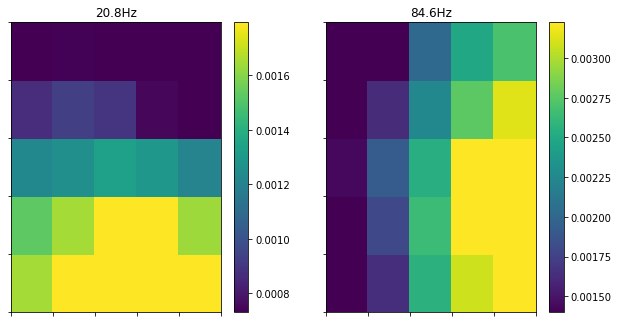

In [86]:
# plot the results, components map
from sompy.visualization.mapview import View2D

view2D = View2D(20, 20,"rand data",text_size=10)
view2D.show(sm, col_sz = 3, which_dim = "all", denormalize = False)

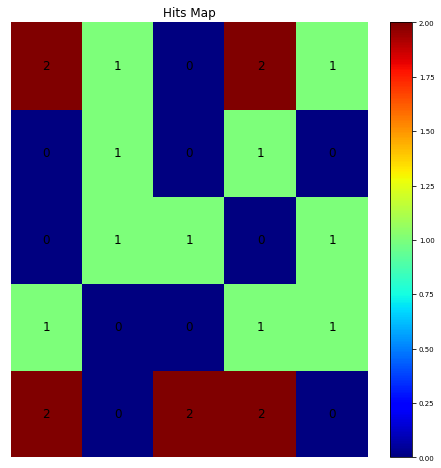

In [87]:
# Hit maps
from sompy.visualization.bmuhits import BmuHitsView

vhts = BmuHitsView(8, 8, "Hits Map", text_size = 7)
vhts.show(sm, anotate = True, onlyzeros = False, labelsize = 12, cmap = "jet", logaritmic = False)

In [88]:
trainingDataArray = trainingDataframe.values
testingDataArray = testingDataframe.values

trainingDataArray = normalization(trainingDataArray)
testingDataArray = normalization(testingDataArray)

#trainingDataArray

In [89]:
"""
Calculates the distance between the input data and the nodess of the map
"""
def inputToNodeDistances(data):
    mapMatrixSquare = sm.codebook.matrix.copy()
    mapMatrixSquare -= data
    mapMatrixSquare = np.square(mapMatrixSquare)
    distances = mapMatrixSquare[:, 0] + mapMatrixSquare[:, 1]
    distances = np.sqrt(distances)
    print(distances)
    
    return distances

In [90]:
trainingDistances = []
testingDistances = []

for trainData in trainingDataArray:
    trainingDistances.append(np.amin(inputToNodeDistances(trainData)))
    
for testData in testingDataArray:
    testingDistances.append(np.amin(inputToNodeDistances(testData)))

#trainingDistances

[0.00206986 0.00159824 0.00090199 0.00062208 0.00059578 0.00172201
 0.00122862 0.0006061  0.00020437 0.00037817 0.0014447  0.00098707
 0.00050216 0.0005248  0.00102535 0.00180525 0.00127628 0.0009273
 0.00098323 0.00130484 0.00208866 0.00155447 0.0012455  0.00120243
 0.00127976]
[0.00064427 0.00093174 0.00163839 0.0021355  0.00236469 0.00074496
 0.00115518 0.00176462 0.00230058 0.00267516 0.0009084  0.00138776
 0.00200998 0.0027029  0.00330829 0.00065334 0.00130981 0.00217126
 0.00282097 0.00343384 0.00049632 0.00125714 0.002196   0.002678
 0.00314893]
[0.00259416 0.00218196 0.00171942 0.00163459 0.00164321 0.00222774
 0.00177807 0.0013486  0.00124769 0.00127868 0.0017906  0.00134905
 0.00082235 0.00068597 0.00107185 0.001972   0.00131197 0.00045039
 0.00028317 0.00093503 0.00220302 0.00143449 0.00054266 0.00015548
 0.00054052]
[8.46018516e-04 7.32728551e-04 1.18483802e-03 1.64641505e-03
 1.86490920e-03 6.01734601e-04 6.85243701e-04 1.19694065e-03
 1.72334858e-03 2.08937755e-03 3.37391

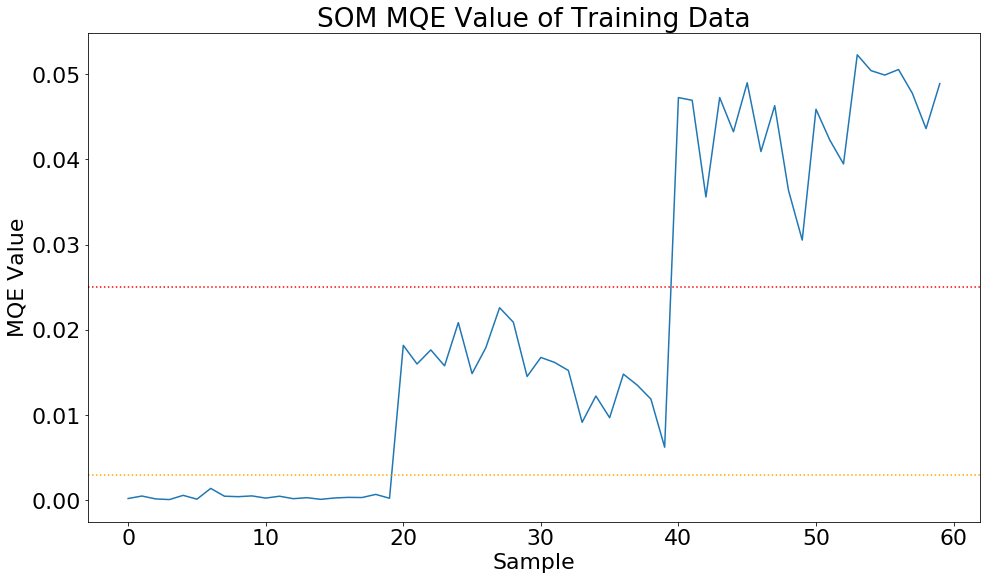

In [139]:
# Plot 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["font.size"] = 22
plt.title("SOM MQE Value of Training Data")
plt.xlabel('Sample')
plt.ylabel('MQE Value')
plt.plot(trainingDistances)
plt.axhline(y = 0.003, color = 'orange', linestyle = ':')
plt.axhline(y = 0.025, color = 'red', linestyle = ':')
plt.show()

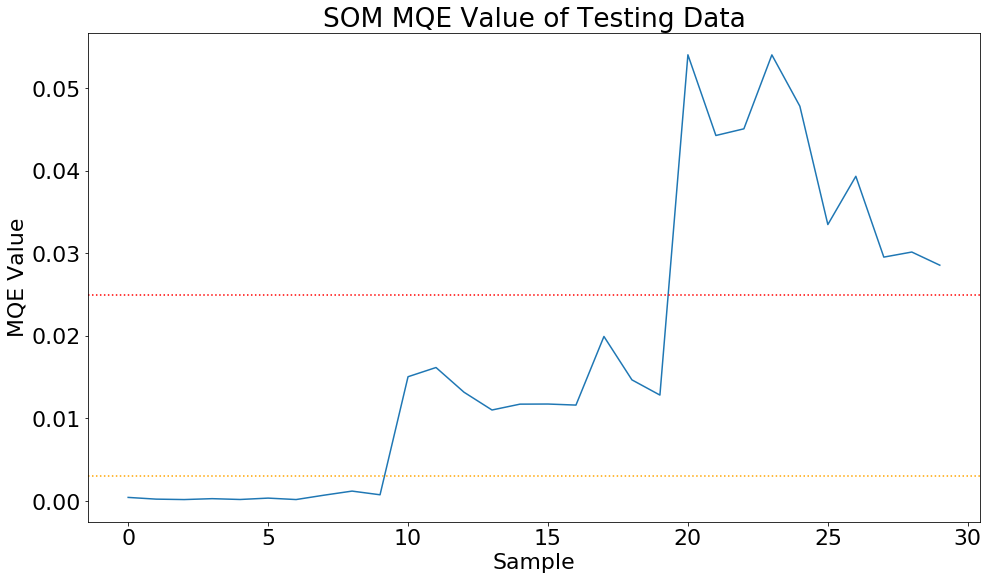

In [141]:
plt.title("SOM MQE Value of Testing Data")
plt.xlabel('Sample')
plt.ylabel('MQE Value')
plt.plot(testingDistances)
plt.axhline(y = 0.003, color='orange', linestyle=':')
plt.axhline(y = 0.025, color='red', linestyle=':')
plt.show()